<a href="https://colab.research.google.com/github/avus23/avus23/blob/main/01_%ED%86%B5%EA%B3%84%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계 분석 방법

##1.중심 극한 정리

모평균 뮤 :  50000.0
[49509.905, 49933.263, 50137.279, 49956.18, 49592.308, 48495.527, 49113.235, 50139.345, 49860.61, 51341.341, 48905.108, 49390.656, 50817.727, 49702.071, 51717.699, 49210.024, 50269.683, 50905.564, 50230.494, 48733.87, 51231.465, 51204.253, 50417.938, 49740.188, 49908.28, 49063.108, 50323.133, 48234.489, 49625.905, 48725.379, 48028.225, 48887.607, 50106.615, 49488.442, 48876.859, 50688.949, 50514.15, 51670.331, 48016.596, 49988.1, 49718.125, 50318.041, 47738.979, 49875.12, 51847.577, 50327.901, 49270.304, 49646.19, 50602.108, 49207.79, 50902.106, 51005.02, 48638.932, 50478.351, 50309.464, 48451.058, 50036.626, 49755.705, 51023.173, 48185.189, 49687.181, 49781.512, 49069.663, 47661.754, 50080.393, 50763.847, 50812.571, 49604.697, 49383.268, 49832.397, 50356.608, 50700.538, 51939.848, 49147.038, 51128.523, 50830.255, 48996.857, 50539.65, 51324.033, 49610.919, 50103.535, 51293.201, 49903.084, 49568.43, 49754.17, 48970.176, 49845.55, 49441.533, 49828.271, 50438.178, 50164.3

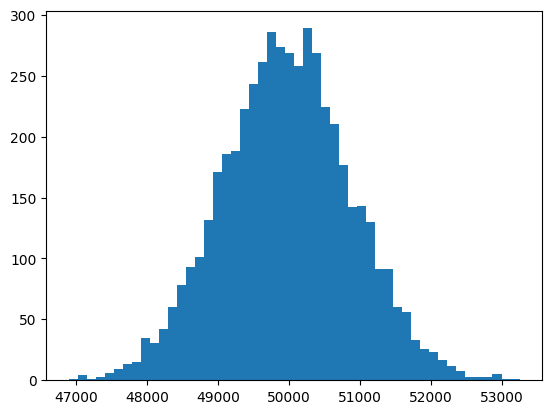

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# x bar~N(mu, dist./n)
# 모집단 range(1,100000) 로 만듬
# 모평균 mu = 50000 ?
# 표본의 크기 = 100
# 시행횟수 = 5000

print("모평균 뮤 : ", np.mean(range(1,100000)))

xbar_list = []
for i in range(5000):
  sample = random.sample(range(1,100000), 1000)
  xbar = np.mean(sample)
  xbar_list.append(xbar)
  #print(sample)
print(xbar_list)
print("xbar의 평균 :", np.mean(xbar_list))

# 히스토그램 xbar_list
plt.hist(xbar_list, bins=50)
plt.show()


##2.t 검정
- 집단 간 평균 차이 검정


### 2-1 One Sample t-test(단일표본 t검정)
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지를 검증하는 방법
- scipy.stats 의 ttest_1samp(a, popman) 이용

In [ ]:
# bus_wait_time.csv

import pandas as pd
bus = pd.read_csv('/content/bus_wait_time.csv')
bus



,waittime
0,14.685862
1,14.099321
2,15.074540
3,14.063753
4,15.004121
...,...
93541,14.596845
93542,15.267857
93543,14.870376
93544,15.719782


In [ ]:
# 1) 가설 설정
# H0 : mu는(wait time) 15분 (버스회사의 주장)
# H1 : mu != 15
# 2) 유의수준 0.05 (95%)
# 3) 검정통계량 산출 (통계량: 표본에서 얻은것을 (검정)에 사용한다. 모집단에서는 통계량이라고 하지 않는다)
# 4) Pvalue와 유의수준 0.05를 비교해서 귀무가설 기각여부 결정

print(np.mean(bus.waittime))

15.00011123283454


In [ ]:
from scipy import stats
stats.ttest_1samp(bus.waittime,popmean=15) # 검정통계량

# 귀무가설 기각? 채택?
# 유의수준 0.05하에 pvalue가 0.95로 유의수준보다 크므로 귀무가설 채택
# 따라서 mu는 15라고 할 수 있다

TtestResult(statistic=0.058841382013004526, pvalue=0.9530785731500322, df=93545)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2-2 Two Sample t-test(독립표본 t검정)
- 서로 다른 두 개의 그룹 간 평균 검정을 위한 방법
- scipy.stats 의 ttest_ind(x, y) 함수 이용


- '새로운 강의 방식이 학생들의 독해력 향상에 도움을 주는가?'
- 새로운 강의 방식에 의한 평균이 기존의 강의방식에 의한 평균보다 큰지 검정
- 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔
- 한 집단에는 기존 방식(old), 한 집단에는 새로운 방식(new)

### H0 : u1 = u2 , H1: u1 > u2

In [ ]:
import pandas as pd
reading = pd.read_csv('Reading.csv')
reading
# two sample vs. paired?
# 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔 -> sample이 전혀 다른 독립 샘플 : two sample


,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


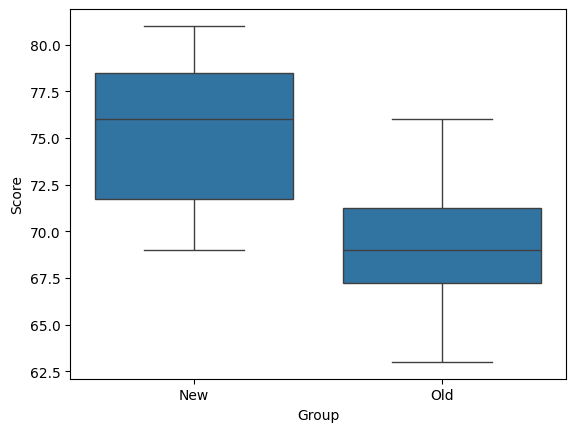

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Group', y='Score', data=reading)
plt.show()
# median 값 차이가 크다


In [ ]:
# 집단 나눔
New = reading[reading.Group == 'New']
Old = reading[reading.Group == 'Old']
New.head()
Old.head()

# 1) 가설 설정
# h0 : old == new, difference = 0
# h1 : old != new, difference != 0
# 2) 검정
stats.ttest_ind(Old.Score, New.Score)
# 귀무가설 기각 (p<0.05)
# 유의수준 0.05하에 pvalue가 0.01로 유의수준보다 작으므로 귀무가설 기각
# 즉, 새로운 강의방식(new group) 과 old group의 평균은 차이가 있다고 할 수 있다.

TtestResult(statistic=-2.9536127902039953, pvalue=0.010470744188033123, df=14.0)

In [ ]:
# h1: old < new, old-new < 0
help(stats.ttest_ind)
stats.ttest_ind(New.Score, Old.Score, alternative='greater')

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
  

TtestResult(statistic=2.9536127902039953, pvalue=0.005235372094016561, df=14.0)

In [ ]:
reading.groupby('Group').mean()

,ID,Score
Group,,
New,4.5,75.375
Old,12.5,69.125


### 2-3 Paired t-test(대응표본 t검정)
- 연관된 두 집단의 차이 에 대한 단일 표본의 평균 검정을 진행하는 방법
- scipy.stats 의 ttest_rel(x, y)
- 실험 단위를 동질적인 쌍으로 묶은 다음 각 쌍에 대해 랜덤하게 두 처리를 적용하고, 각 쌍에서 얻어진 반응 값의 차이를 이용하여 두 모평균 비교


대응표본 t- 검정사례
- '컴퓨터 교육 실시하기 전과 후의 성적 차이가 있는가?'
- 15명의 학생에게 통계학 시험 성적 전후 비교

In [ ]:
paired = pd.read_csv('Paired.csv')
paired.head()



,ID,Pretest,Posttest
0,1,80,82
1,2,73,71
2,3,70,95
3,4,60,69
4,5,88,100


<Axes: >

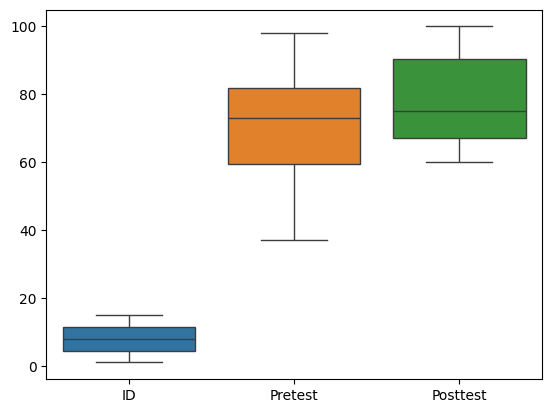

In [ ]:
sns.boxplot(paired)

In [ ]:
# 1)가설설정
# h0 : pretest == posttest
# h1 : pretest != posttest

stats.ttest_rel(paired.Pretest, paired.Posttest, alternative='less')

# 유의수준 0.05하에 pvalue가 0.003으로 유의수준보다 작으므로 h0 기각
# 즉, pretest가 posttest보다 평균이 작다고 할 수 있다


TtestResult(statistic=-3.093705670004429, pvalue=0.003965461614513267, df=14)

## 3.카이제곱 독립성 검정
- 서로 연관성이 있는가? (독립적인가?)
- scipy.stats 의 chi2_contingency() 함수 이용


- 2차원 교차표(분할표) 작성 - Prefer 데이터

In [ ]:
import pandas as pd

Prefer = pd.read_csv('/content/Prefer.csv')


##4.상관 분석

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

student=pd.read_csv('/content/Student.csv')
